### Author: Mussa Ngosha

#### Date: 2022

#### Topic: National Data Buoy Centre (NDBC) Data

#### 1.1 Loading and Plotting NDBC Data

In [1]:
# Python libraries
import xarray as xr
import netCDF4

## Dataset
data = xr.open_dataset('https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/44025/44025.ncml')

In [2]:
# dimension of the dataset
data.dims

Frozen({'latitude': 1, 'longitude': 1, 'time': 288281})

In [3]:
# variables of the dataset
data.var

<bound method DatasetReductions.var of <xarray.Dataset>
Dimensions:                  (latitude: 1, longitude: 1, time: 288281)
Coordinates:
  * latitude                 (latitude) float32 40.25
  * longitude                (longitude) float32 -73.16
  * time                     (time) datetime64[ns] 1975-10-24T12:00:00 ... 20...
Data variables: (12/13)
    wind_dir                 (time, latitude, longitude) float64 ...
    wind_spd                 (time, latitude, longitude) float32 ...
    gust                     (time, latitude, longitude) float32 ...
    wave_height              (time, latitude, longitude) float32 ...
    dominant_wpd             (time, latitude, longitude) timedelta64[ns] ...
    average_wpd              (time, latitude, longitude) timedelta64[ns] ...
    ...                       ...
    air_pressure             (time, latitude, longitude) float32 ...
    air_temperature          (time, latitude, longitude) float32 ...
    sea_surface_temperature  (time, latitud

In [10]:
# Let's subset the dataset for one year
data_one = data.sel(time = slice('2019-01-01','2020-01-01'))

In [11]:
# select one variable (sea surface temperature)
sst = data_one.sea_surface_temperature
sst

<xarray.DataArray 'sea_surface_temperature' (time: 8669, latitude: 1,
                                             longitude: 1)>
array([[[7.1]],

       [[7.1]],

       ...,

       [[9. ]],

       [[9. ]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 40.25
  * longitude  (longitude) float32 -73.16
  * time       (time) datetime64[ns] 2019-01-01T00:50:00 ... 2019-12-31T22:50:00
Attributes:
    long_name:      Sea Surface Temperature
    short_name:     wtmp
    standard_name:  sea_surface_temperature
    units:          degree_Celsius

#### 1.2 Visualizing

In [12]:
# For the simplicity of ploting, lets convert xarray dataset to pandas dataframe
df_sst = sst.to_dataframe().reset_index().set_index('time')
df_sst.head()

,latitude,longitude,sea_surface_temperature
time,,,
2019-01-01 00:50:00,40.250999,-73.164001,7.1
2019-01-01 01:50:00,40.250999,-73.164001,7.1
2019-01-01 02:50:00,40.250999,-73.164001,7.2
2019-01-01 03:50:00,40.250999,-73.164001,7.2
2019-01-01 04:50:00,40.250999,-73.164001,7.2


In [21]:
# Access air temprature
air_temp = data_one.air_temperature


In [23]:
# convert to pandas Dataframe
df_air_temp = air_temp.to_dataframe().reset_index().set_index('time')
df_air_temp

,latitude,longitude,air_temperature
time,,,
2019-01-01 00:50:00,40.250999,-73.164001,8.1
2019-01-01 01:50:00,40.250999,-73.164001,8.3
2019-01-01 02:50:00,40.250999,-73.164001,8.7
2019-01-01 03:50:00,40.250999,-73.164001,9.5
2019-01-01 04:50:00,40.250999,-73.164001,10.2
...,...,...,...
2019-12-31 18:50:00,40.250999,-73.164001,5.9
2019-12-31 19:50:00,40.250999,-73.164001,6.4
2019-12-31 20:50:00,40.250999,-73.164001,7.2


In [33]:
# Access wind speed data
wind_sp = data_one.wind_spd

In [35]:
# convert to pandas dataframe
df_wind_sp = wind_sp.to_dataframe().reset_index().set_index('time')
df_wind_sp.head()

,latitude,longitude,wind_spd
time,,,
2019-01-01 00:50:00,40.250999,-73.164001,11.3
2019-01-01 01:50:00,40.250999,-73.164001,11.2
2019-01-01 02:50:00,40.250999,-73.164001,12.7
2019-01-01 03:50:00,40.250999,-73.164001,13.7
2019-01-01 04:50:00,40.250999,-73.164001,9.5


In [ ]:
df_sst = sst.to_dataframe().reset_index().set_index('time')

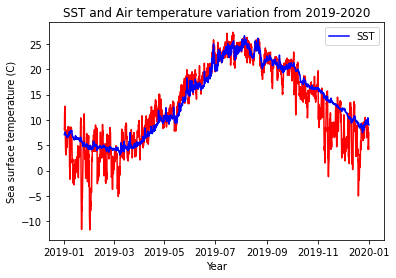

In [40]:
# simple plot using matplot 
from cProfile import label
import matplotlib.pyplot as plt
plt.plot(df_air_temp.index,df_air_temp.air_temperature, color='r')
plt.plot(df_sst.index, df_sst.sea_surface_temperature, color = 'b', label = 'SST')
plt.xlabel('Year')
plt.ylabel('Sea surface temperature (C)')
plt.title('SST and Air temperature variation from 2019-2020')
plt.legend()
plt.show()

Text(0.5, 1.0, 'NDBC Station 44025')

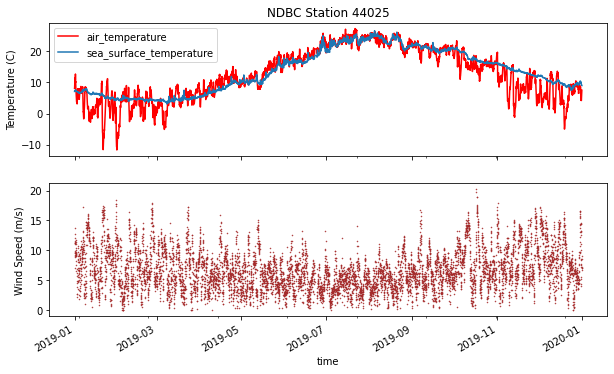

In [44]:
#  Subplot for sst and air temperature and wind speed
fig, (ax1,ax2) = plt.subplots(2,1, sharex= True, figsize = (10,6))

df_air_temp.air_temperature.plot(ax = ax1, color = 'r')
df_sst.sea_surface_temperature.plot(ax = ax1)
df_wind_sp.wind_spd.plot(ax = ax2, marker = '.', linestyle = '', markersize = 1, color = 'brown')

ax1.legend()
ax1.set_ylabel('Temperature (C)')
ax2.set_ylabel('Wind Speed (m/s)')
ax1.set_title('NDBC Station 44025')
# Save the figure to a file
#fig.savefig('44025_example.png')

In [45]:
# Plot two axes on the same plot
# The following example uses 2 y-axes to plot both Water Temperature and Dissolved Oxygen from an estuarine site near Atlantic City
# Load a JCNERR Estuarine Station from NDBC

df_sst_0xy = xr.open_dataset('https://dods.ndbc.noaa.gov/thredds/dodsC/data/ocean/jctn4/jctn4o9999.nc')
df_sst_0xy = df_sst_0xy.sel(time=slice('2019-06-01','2020-06-01')).to_dataframe().reset_index().set_index('time')

In [46]:
## view the retrived data
df_sst_0xy.head()

,latitude,longitude,depth,water_temperature,conductivity,salinity,o2_saturation,dissolved_oxygen,chlorophyll_concentration,turbidity,water_ph,water_eh
time,,,,,,,,,,,,
2019-06-01 00:00:00,39.507999,-74.337997,2.5,17.200001,46.230000,30.1,99.599998,8.0,NaN,4.0,8.0,NaN
2019-06-01 00:15:00,39.507999,-74.337997,2.5,17.200001,46.240002,30.1,97.599998,7.8,NaN,3.0,8.0,NaN
2019-06-01 00:30:00,39.507999,-74.337997,2.4,17.299999,46.230000,30.1,98.599998,7.9,NaN,3.0,8.0,NaN
2019-06-01 00:45:00,39.507999,-74.337997,2.4,17.299999,46.220001,30.1,98.900002,7.9,NaN,3.0,8.0,NaN
2019-06-01 01:00:00,39.507999,-74.337997,2.3,17.299999,46.180000,30.0,98.699997,7.9,NaN,3.0,8.0,NaN


Text(0.5, 1.0, 'Water temperature and Dissolved oxygen')

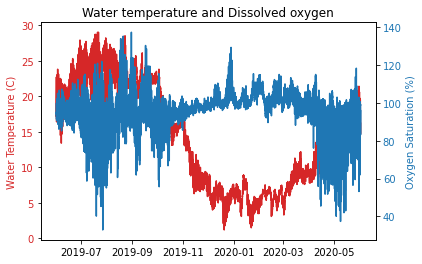

In [50]:
# A graph with two axes
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
# The first y
color = 'tab:red'
ax1.plot(df_sst_0xy.index, df_sst_0xy.water_temperature, color=color)
ax1.set_ylabel('Water Temperature (C)', color=color)
ax1.tick_params(axis='y', labelcolor=color)

color = 'tab:blue'
ax2.plot(df_sst_0xy.index, df_sst_0xy.o2_saturation, color=color)
ax2.set_ylabel('Oxygen Saturation (%)', color=color)  
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Water temperature and Dissolved oxygen')

#### 1.3 Basic Bulk Statistics

In [59]:
# simple statistics from the dataset
# check the total observations
# Acess and convert to pandas dataframe
data_one = data.sel(time = slice('2019-01-01','2020-01-01'))
data_one2 = data_one.to_dataframe().reset_index().set_index('time')

In [61]:
# Total number of observations
data_one2.shape

(8669, 15)

In [62]:
# display first five rows and last rows
data_one2.head()

,latitude,longitude,wind_dir,wind_spd,gust,wave_height,dominant_wpd,average_wpd,mean_wave_dir,air_pressure,air_temperature,sea_surface_temperature,dewpt_temperature,visibility,water_level
time,,,,,,,,,,,,,,,
2019-01-01 00:50:00,40.250999,-73.164001,135.0,11.3,14.1,1.56,0 days 00:00:05.559999943,0 days 00:00:04.710000038,153.0,1018.400024,8.1,7.1,NaN,NaN,NaN
2019-01-01 01:50:00,40.250999,-73.164001,127.0,11.2,14.0,1.92,0 days 00:00:05.880000114,0 days 00:00:05.090000153,135.0,1016.599976,8.3,7.1,NaN,NaN,NaN
2019-01-01 02:50:00,40.250999,-73.164001,137.0,12.7,15.3,2.23,0 days 00:00:06.250000,0 days 00:00:05.219999790,143.0,1013.599976,8.7,7.2,NaN,NaN,NaN
2019-01-01 03:50:00,40.250999,-73.164001,150.0,13.7,16.9,2.52,0 days 00:00:06.670000076,0 days 00:00:05.489999771,148.0,1010.700012,9.5,7.2,NaN,NaN,NaN
2019-01-01 04:50:00,40.250999,-73.164001,168.0,9.5,11.2,2.77,0 days 00:00:07.139999866,0 days 00:00:05.750000,141.0,1010.000000,10.2,7.2,NaN,NaN,NaN


In [67]:
# perform descriptive statistics
data_one2.describe()

,latitude,longitude,wind_dir,wind_spd,gust,wave_height,dominant_wpd,average_wpd,mean_wave_dir,air_pressure,air_temperature,sea_surface_temperature,dewpt_temperature,visibility,water_level
count,8669.000000,8669.000000,8642.000000,8669.000000,8669.000000,8660.000000,8641,8660,8641.000000,8669.000000,8669.000000,8669.000000,0.0,0.0,0.0
mean,40.250999,-73.164001,195.684679,6.693529,8.168382,1.274927,0 days 00:00:07.330060231,0 days 00:00:04.976726332,162.821548,1016.819458,12.502111,13.550720,NaN,NaN,NaN
std,0.000000,0.000000,100.992567,3.437415,4.219827,0.736393,0 days 00:00:02.633673295,0 days 00:00:00.979788392,70.678750,8.206480,8.092082,6.862919,NaN,NaN,NaN
min,40.250999,-73.164001,1.000000,0.000000,0.000000,0.220000,0 days 00:00:02.470000029,0 days 00:00:02.950000048,1.000000,985.599976,-11.700000,3.100000,NaN,NaN,NaN
25%,40.250999,-73.164001,106.250000,4.200000,5.100000,0.760000,0 days 00:00:05.260000229,0 days 00:00:04.260000229,110.000000,1011.500000,6.100000,6.900000,NaN,NaN,NaN
50%,40.250999,-73.164001,213.000000,6.200000,7.400000,1.080000,0 days 00:00:07.139999866,0 days 00:00:04.829999924,152.000000,1016.900024,12.000000,13.100000,NaN,NaN,NaN
75%,40.250999,-73.164001,282.000000,8.700000,10.600000,1.570000,0 days 00:00:09.090000153,0 days 00:00:05.559999943,194.000000,1022.299988,20.100000,20.299999,NaN,NaN,NaN
max,40.250999,-73.164001,360.000000,20.299999,26.900000,4.600000,0 days 00:00:17.389999390,0 days 00:00:09.739999771,360.000000,1040.599976,27.299999,26.600000,NaN,NaN,NaN


In [68]:
# descriptive statistics for specific columns
data_one2[['sea_surface_temperature', 'air_temperature', 'wind_spd']].describe()

,sea_surface_temperature,air_temperature,wind_spd
count,8669.000000,8669.000000,8669.000000
mean,13.550720,12.502111,6.693529
std,6.862919,8.092082,3.437415
min,3.100000,-11.700000,0.000000
25%,6.900000,6.100000,4.200000
50%,13.100000,12.000000,6.200000
75%,20.299999,20.100000,8.700000
max,26.600000,27.299999,20.299999


In [72]:
# you can also perform the descriptive statistic for individual column using particular statistical functions such as mean, median, std etc.
# e.g replace a mean function with others before the accessed variable
print(round(data_one2['wind_spd'].mean(),2))

6.69


In [ ]:
# save the dataframe to csv
# data_one2[['sea_surface_temperature', 'air_temperature', 'wind_spd']].describe().to_csv()

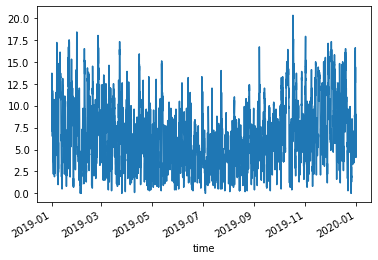

In [78]:
# A quick plot for wind speed
data_one2.wind_spd.plot()
plt.show()

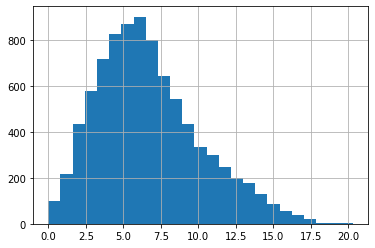

In [82]:
#  A quick histogram plot for wind speed
data_one2.wind_spd.hist(bins=25)
plt.show()

In [86]:
# We can also grab the largest or smallest values in at dataset using nlargest() or nsmallest().
# the largest values
data_one2.wind_spd.nlargest()

time
2019-10-17 03:50:00    20.299999
2019-10-17 00:50:00    19.799999
2019-10-17 04:50:00    18.900000
2019-10-17 05:50:00    18.900000
2019-01-31 00:50:00    18.400000
Name: wind_spd, dtype: float32

In [87]:
# the lowest values
data_one2.wind_spd.nsmallest()

time
2019-02-04 08:50:00    0.0
2019-02-04 14:50:00    0.0
2019-02-04 21:50:00    0.0
2019-02-04 22:50:00    0.0
2019-03-25 22:50:00    0.0
Name: wind_spd, dtype: float32

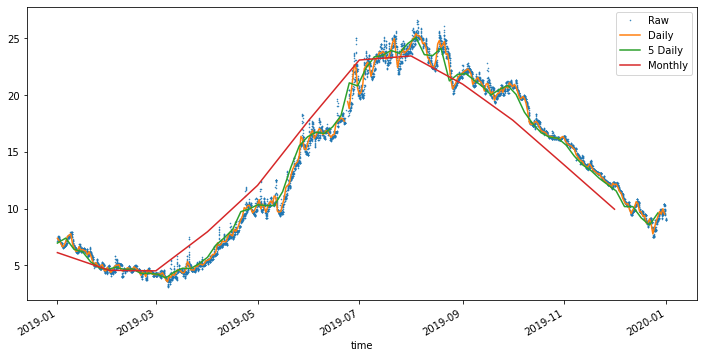

In [92]:
# We can also easily calculate hourly, daily and monthly averages using pandas.resample. A number of offset options are available for specifying the interval
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
data_one2['sea_surface_temperature'].plot(ax=ax,label='Raw', linestyle='None', marker='.', markersize=1)
data_one2['sea_surface_temperature'].resample('D').mean().plot(ax=ax,label='Daily')
data_one2['sea_surface_temperature'].resample('5D').mean().plot(ax=ax,label='5 Daily')
data_one2['sea_surface_temperature'].resample('MS').mean().plot(ax=ax,label='Monthly')
plt.legend()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_19340\886454564.py:11: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  data_one2['sea_surface_temperature'].resample('MS',loffset=timedelta(days=15)).mean().plot(ax=ax,label='15th of the Month',marker='d')


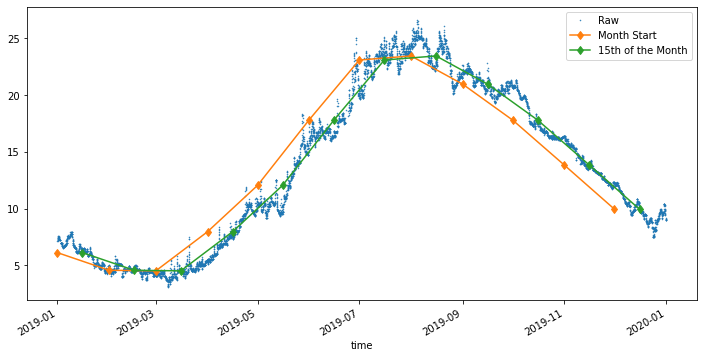

In [96]:
# Note that by default, pandas only provides Month Start (MS) or Month End (M) periods.But in oceanography we want our graphs to have physical meaning. One option, 
# that gets us a little closer to a centered average is to use the loffset parameter.
# Let's try this again, but add a 15-day offset to the monthly average 

from datetime import timedelta

fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
data_one2['sea_surface_temperature'].plot(ax=ax,label='Raw', linestyle='None', marker='.', markersize=1)
data_one2['sea_surface_temperature'].resample('MS').mean().plot(ax=ax,label='Month Start',marker='d') #MS=Month Start
data_one2['sea_surface_temperature'].resample('MS',loffset=timedelta(days=15)).mean().plot(ax=ax,label='15th of the Month',marker='d')
plt.legend()
plt.show()